# Assignment-1 Frequency Analysis and Bag of Words
## Objectives

*   Learn the keywords of NLP
*   Understand basic of NLP
*   Explore the Bag of words for basic analysis of text




# Details

In [1]:
import datetime

student_rollno = 26
student_name = 'Ram Krishna Pudasaini'
assignment_tag = 'MDS555-2023-Assignment-1'

In [2]:
# from checker_utils import done
def done(task):
    _date = datetime.datetime.now()
    task = task + ": " + str(_date)
    print('='*len(task), '\n', task , '\n', '='*len(task), sep='')
    pass

# Literature Review

This assignment is based on the frequency analysis and bag of words for the text documents that can be in different formats. Here we scrab a website article pages and grab the title of text for 3 categories, business, entertainment and sports. We prepare the data set in csv format and access it through the github.

Once we have the dataset we start preprocessing it for machine use. Here we remove pauncuation, special characters and numbers from the text. The cleaning process is done so we tokenize the news column into words and count the word frequency. We then use nepali stopwords to filter out stop words from the Tokenized_Input and again calculate the word frequency and frequency bar graph.

Next we create the bag of words from the Tokenized_Input and use them to classify the content. We also use the Multinomial Naive Bayes Classifier to classify the document text and got the accuracy of 63%.

To perform this task we used different library and packages like sklearn, pandas, numpy, BeautifulSoup, nltk for Natural Language Processing  and many other pacakges.


# Task 1: Dataset Preparation:

*  Prepare the Nepali news dataset (hint: you can
obtain text from news websites, at least 20 different news of 2/3 different
categories).
*  Host the dataset in the public git repository.
*  In your notebook data should be downloaded from git or some other public
places.
*  No additional step should be done to get the notebook working

In [3]:
# web scraping and saving to csv file
# import requests
# import pandas as pd
# from urllib.parse import urlparse
# from bs4 import BeautifulSoup
# from google.colab import drive

# import warnings
# warnings.simplefilter(action='ignore')

# def scrape_news_and_save_to_csv(urls, csv_filename):
#     # Mount Google Drive
#     drive.mount('/content/drive')

#     columns = ["Input", "Category"]
#     df = pd.DataFrame(columns=columns)

#     host_name = ''
#     for url_info in urls:
#         category = list(url_info.keys())[0]
#         url = list(url_info.values())[0]

#         parsed_url = urlparse(url)
#         host_name = parsed_url.netloc.replace('.', '-')

#         print(f"category: {category} >> loading URL... {url}")
#         response = requests.get(url)
#         if response.status_code == 200:
#             content = response.text
#             soup = BeautifulSoup(content, 'html.parser')
#             paragraphs = soup.find_all('article')
#             for paragraph in paragraphs:
#                 data = {"Input": paragraph.get_text(), "Category": category}
#                 df = df.append(data, ignore_index=True)

#     # Save the DataFrame to CSV in Google Drive
#     csv_path = f'/content/drive/MyDrive/{csv_filename}'
#     df.to_csv(csv_path, index=False)
#     print(f'Data saved to {csv_path}')

# #articles need to be fetched from these urls
# urls = [
#     {'business': 'https://ekantipur.com/business'},
#     {'sports': 'https://ekantipur.com/sports'},
#     {'entertainment': 'https://ekantipur.com/entertainment'}
# ]

# #call the function
# scrape_news_and_save_to_csv(urls, 'nepali_news_dataset.csv')


In [4]:
import pandas as pd

#Getting the data from github
github_csv_url = 'https://raw.githubusercontent.com/Rk-Pudasaini/NLP/main/Assignments_NLP/nepali_news_dataset.csv'

# Read the CSV file from GitHub into a DataFrame
df = pd.read_csv(github_csv_url, encoding='utf-8')

In [5]:
df.head()

,Input,Category
0,"नेप्से १९६० मा ओर्लियो, सबै सूचक घटे",business
1,"कच्चा तेलको भाउ २०२३ कै उच्च विन्दुमा, नेपालमा...",business
2,साधना र सबैको लघुवित्त मर्जमा जाने,business
3,भारत निर्यात हुने बिजुलीले बढी मूल्य पाउन थाल्यो,business
4,निजी बैंकका कर्मचारीमा पनि श्रम ऐन लागू हुने,business


In [6]:
done('Task 1')

Task 1: 2023-09-16 13:56:20.309083


# Task 2.1: Frequency Analysis
Perform the frequency analysis on the text
collected

In [7]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# Function to tokenize the 'Input' column and store the result in a new column
def tokenize_text(df, Input, new_column_name):
    df[new_column_name] = df[Input].apply(lambda x: word_tokenize(x))
    return df

# Tokenize the 'Input' column and store the result in a new column called 'Tokenized_Input'
df = tokenize_text(df, 'Input', 'Tokenized_Input')

df.head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Input,Category,Tokenized_Input
0,"नेप्से १९६० मा ओर्लियो, सबै सूचक घटे",business,"[नेप्से, १९६०, मा, ओर्लियो, ,, सबै, सूचक, घटे]"
1,"कच्चा तेलको भाउ २०२३ कै उच्च विन्दुमा, नेपालमा...",business,"[कच्चा, तेलको, भाउ, २०२३, कै, उच्च, विन्दुमा, ..."
2,साधना र सबैको लघुवित्त मर्जमा जाने,business,"[साधना, र, सबैको, लघुवित्त, मर्जमा, जाने]"
3,भारत निर्यात हुने बिजुलीले बढी मूल्य पाउन थाल्यो,business,"[भारत, निर्यात, हुने, बिजुलीले, बढी, मूल्य, पा..."
4,निजी बैंकका कर्मचारीमा पनि श्रम ऐन लागू हुने,business,"[निजी, बैंकका, कर्मचारीमा, पनि, श्रम, ऐन, लागू..."


In [8]:
import string

# Function to tokenize and clean the 'Input' column
def tokenize_and_clean_text(df, input_column_name, new_column_name):
    def clean_text(text):
        # Remove punctuation and numbers, and convert to lowercase
        text = text.replace('।', '')
        text = text.replace('‘', '')
        text = text.replace('’', '')
        text = text.replace('–', '')

        text = ''.join([char for char in text if char not in string.punctuation and not char.isdigit()])
        return text.lower()

    df[new_column_name] = df[input_column_name].apply(clean_text)
    df[new_column_name] = df[new_column_name].apply(lambda x: word_tokenize(x))
    return df

# Tokenize and clean the 'Input' column, storing the result in a new column called 'Tokenized_Input'
df = tokenize_and_clean_text(df, 'Input', 'Tokenized_Input')

df.head()


,Input,Category,Tokenized_Input
0,"नेप्से १९६० मा ओर्लियो, सबै सूचक घटे",business,"[नेप्से, मा, ओर्लियो, सबै, सूचक, घटे]"
1,"कच्चा तेलको भाउ २०२३ कै उच्च विन्दुमा, नेपालमा...",business,"[कच्चा, तेलको, भाउ, कै, उच्च, विन्दुमा, नेपालम..."
2,साधना र सबैको लघुवित्त मर्जमा जाने,business,"[साधना, र, सबैको, लघुवित्त, मर्जमा, जाने]"
3,भारत निर्यात हुने बिजुलीले बढी मूल्य पाउन थाल्यो,business,"[भारत, निर्यात, हुने, बिजुलीले, बढी, मूल्य, पा..."
4,निजी बैंकका कर्मचारीमा पनि श्रम ऐन लागू हुने,business,"[निजी, बैंकका, कर्मचारीमा, पनि, श्रम, ऐन, लागू..."


In [9]:
from collections import Counter

# Calculate word frequency
all_tokens = [token for tokens in df['Tokenized_Input'] for token in tokens]
word_freq = Counter(all_tokens)

# Get the top N most common words
top_words = word_freq.most_common(20)

# Print the top words and their frequencies
for word, freq in top_words:
    print(f'{word}: {freq}')

संग्रह: 29
सेयर: 29
छ: 25
र: 22
भएको: 12
हो: 9
गरेको: 9
छन्: 9
नेपाल: 8
शनिबार: 8
पनि: 7
हुने: 7
नयाँ: 7
लागि: 6
तथा: 6
नेपाली: 6
सार्वजनिक: 6
मा: 5
गरे: 5
यो: 5


<ipython-input-10-5370b8c5fb62>:21: UserWarning: Glyph 2360 (\N{DEVANAGARI LETTER SA}) missing from current font.
  plt.tight_layout()
<ipython-input-10-5370b8c5fb62>:21: UserWarning: Matplotlib currently does not support Devanagari natively.
  plt.tight_layout()
<ipython-input-10-5370b8c5fb62>:21: UserWarning: Glyph 2306 (\N{DEVANAGARI SIGN ANUSVARA}) missing from current font.
  plt.tight_layout()
<ipython-input-10-5370b8c5fb62>:21: UserWarning: Glyph 2327 (\N{DEVANAGARI LETTER GA}) missing from current font.
  plt.tight_layout()
<ipython-input-10-5370b8c5fb62>:21: UserWarning: Glyph 2381 (\N{DEVANAGARI SIGN VIRAMA}) missing from current font.
  plt.tight_layout()
<ipython-input-10-5370b8c5fb62>:21: UserWarning: Glyph 2352 (\N{DEVANAGARI LETTER RA}) missing from current font.
  plt.tight_layout()
<ipython-input-10-5370b8c5fb62>:21: UserWarning: Glyph 2361 (\N{DEVANAGARI LETTER HA}) missing from current font.
  plt.tight_layout()
<ipython-input-10-5370b8c5fb62>:21: UserWarning: Glyph 

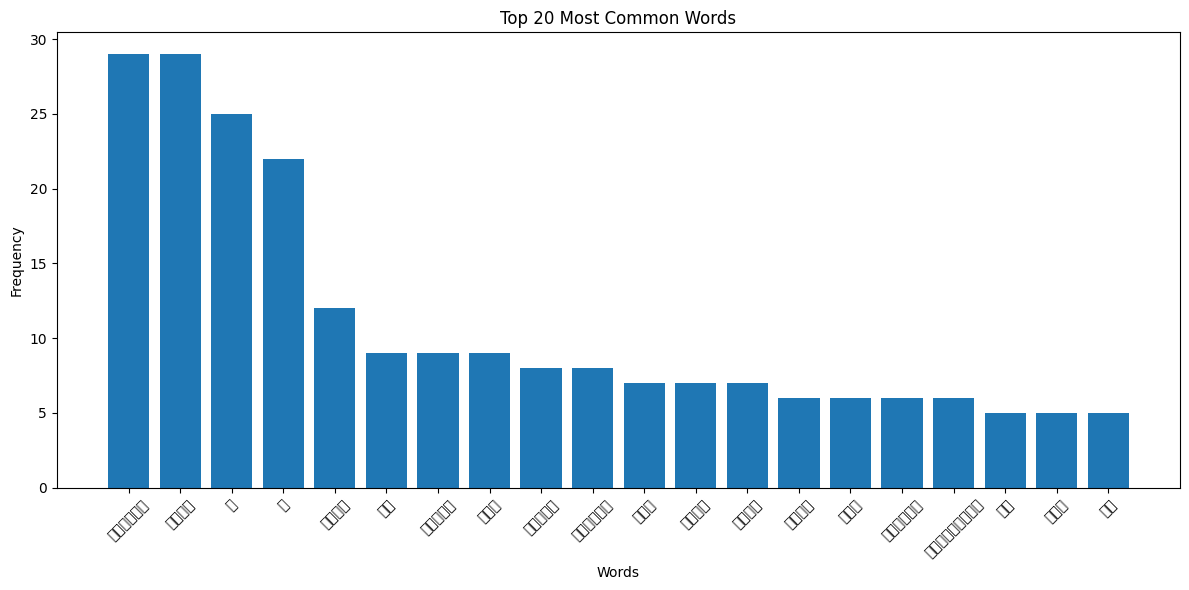

In [10]:
#plot the frequency of the words in the bar graph
import matplotlib.pyplot as plt

# Extract words and frequencies
words, freqs = zip(*top_words)

# #Specify the path to your Nepali font
# nepali_font_path = 'C:USERS/RAMOM/APPDATA/LOCAL/MICROSOFT/WINDOWS/FONTS/DEVNEW.TTF'

# # Configure Matplotlib to use the Nepali font
# plt.rcParams['font.family'] = 'DEVNEW'
# plt.rcParams['font.serif'] = nepali_font_path

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(words, freqs)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Words')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the bar chart
plt.show()

In [11]:
done('Task 2.1')

Task 2.1: 2023-09-16 13:56:21.931298


# Task 2.2: Filter Stop words :
Improve Performance analysis by filtering stop
words (you can also develop rule based )

In [12]:
#import libraries
nltk.download('stopwords')
from nltk.corpus import stopwords

# Remove stop words
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('nepali'))
    return [token for token in tokens if token.lower() not in stop_words]

df['No_Stopwords'] = df['Tokenized_Input'].apply(remove_stopwords)

df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Input,Category,Tokenized_Input,No_Stopwords
0,"नेप्से १९६० मा ओर्लियो, सबै सूचक घटे",business,"[नेप्से, मा, ओर्लियो, सबै, सूचक, घटे]","[नेप्से, ओर्लियो, सूचक, घटे]"
1,"कच्चा तेलको भाउ २०२३ कै उच्च विन्दुमा, नेपालमा...",business,"[कच्चा, तेलको, भाउ, कै, उच्च, विन्दुमा, नेपालम...","[कच्चा, तेलको, भाउ, कै, उच्च, विन्दुमा, नेपालम..."
2,साधना र सबैको लघुवित्त मर्जमा जाने,business,"[साधना, र, सबैको, लघुवित्त, मर्जमा, जाने]","[साधना, सबैको, लघुवित्त, मर्जमा, जाने]"
3,भारत निर्यात हुने बिजुलीले बढी मूल्य पाउन थाल्यो,business,"[भारत, निर्यात, हुने, बिजुलीले, बढी, मूल्य, पा...","[भारत, निर्यात, बिजुलीले, बढी, मूल्य, पाउन, था..."
4,निजी बैंकका कर्मचारीमा पनि श्रम ऐन लागू हुने,business,"[निजी, बैंकका, कर्मचारीमा, पनि, श्रम, ऐन, लागू...","[निजी, बैंकका, कर्मचारीमा, श्रम, ऐन, लागू]"


In [13]:
# Calculate word frequency after removing stop words
all_tokens = [token for tokens in df['No_Stopwords'] for token in tokens]
word_freq = Counter(all_tokens)

# Get the top N most common words
top_words = word_freq.most_common(30)

# Print the top words and their frequencies
for word, freq in top_words:
    print(f'{word}: {freq}')

संग्रह: 29
सेयर: 29
नेपाल: 8
शनिबार: 8
नेपाली: 6
सार्वजनिक: 6
गरे: 5
फिल्म: 5
खर्ब: 4
महिला: 4
राष्ट्रिय: 4
गरिएको: 4
उपाधि: 4
शारीरिक: 4
भारत: 3
रुपैयाँ: 3
बिमा: 3
धान: 3
सृजनशील: 3
आयोजना: 3
अध्यक्ष: 3
टिमको: 3
प्रदर्शन: 3
नेपालको: 3
सुगठन: 3
सुरु: 3
गोल: 3
मिनेटमा: 3
कुङफु: 3
केएमसी: 3


In [14]:
done('Task 2.2')

Task 2.2: 2023-09-16 13:56:22.004532


# Task 3: BoW:
Prepare Bag of Words (BoW) from the dataset

In [15]:
#Prepare Bag of Words (BoW) from the dataset
from sklearn.feature_extraction.text import CountVectorizer

# Create BoW representation
corpus = df['No_Stopwords'].apply(lambda x: ' '.join(x))  # Convert the list of words back to text

#vectorize and transform corpus
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

# The resulting 'X' matrix is the Bag of Words (BoW) representation
# Each row corresponds to a document, and each column corresponds to a word in the vocabulary

# Get the vocabulary (list of words)
vocabulary = vectorizer.get_feature_names_out()

# Convert the BoW matrix into a DataFrame
bow_df = pd.DataFrame(X.toarray(), columns=vocabulary)

#display head items
bow_df.head()

,अध,अन,अनप,अप,अपर,अफ,अभ,अम,अर,अल,...,सलल,सव,सवक,सस,सह,सहय,हक,हर,हल,हलम
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
done('Task 3')

Task 3: 2023-09-16 13:56:22.055873


# Task 4: Classification:
Classify the news based on Keywords and BoW you
computed in Task 3

In [17]:
#Classify the news based on Keywords and BoW
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Sample keywords for each category in Nepali
keywords = {
    'Sports': ['खेल', 'खेलकुद', 'फुटबल', 'क्रिकेट', 'टेनिस', 'ब्याडमिनटन', 'जित', 'टिम', 'वर्षा'],
    'Entertainment': ['मनोरञ्जन', 'सिनेमा', 'संगीत', 'प्रस्तुतकरण', 'कला', 'रिलिज'],
    'Business': ['व्यापार', 'वित्त', 'अर्थतन्त्र', 'उद्योग', 'निवेश', 'सेयर बजार', 'भाउ', 'लघुवित्त', 'बैंक', 'निर्यात', 'उच्च', 'श्रम', 'खर्ब', 'रिपोर्ट', 'उद्यमी']
}

# Create a CountVectorizer instance
vectorizer = CountVectorizer()

# Define a function to classify news articles
def classify_news(article, keywords):
    article_text = ' '.join(article)
    article_bow = vectorizer.fit_transform([article_text])

    category_similarities = {category: cosine_similarity(article_bow, vectorizer.transform([' '.join(category_keywords)]))[0][0] for category, category_keywords in keywords.items()}

    return max(category_similarities, key=category_similarities.get)

# Classify each news article and store the result in a new column
df['Predicted_Category'] = [classify_news(row['Tokenized_Input'], keywords) for _, row in df.iterrows()]

# Display the DataFrame with predicted categories
df.head(15)

,Input,Category,Tokenized_Input,No_Stopwords,Predicted_Category
0,"नेप्से १९६० मा ओर्लियो, सबै सूचक घटे",business,"[नेप्से, मा, ओर्लियो, सबै, सूचक, घटे]","[नेप्से, ओर्लियो, सूचक, घटे]",Sports
1,"कच्चा तेलको भाउ २०२३ कै उच्च विन्दुमा, नेपालमा...",business,"[कच्चा, तेलको, भाउ, कै, उच्च, विन्दुमा, नेपालम...","[कच्चा, तेलको, भाउ, कै, उच्च, विन्दुमा, नेपालम...",Sports
2,साधना र सबैको लघुवित्त मर्जमा जाने,business,"[साधना, र, सबैको, लघुवित्त, मर्जमा, जाने]","[साधना, सबैको, लघुवित्त, मर्जमा, जाने]",Business
3,भारत निर्यात हुने बिजुलीले बढी मूल्य पाउन थाल्यो,business,"[भारत, निर्यात, हुने, बिजुलीले, बढी, मूल्य, पा...","[भारत, निर्यात, बिजुलीले, बढी, मूल्य, पाउन, था...",Sports
4,निजी बैंकका कर्मचारीमा पनि श्रम ऐन लागू हुने,business,"[निजी, बैंकका, कर्मचारीमा, पनि, श्रम, ऐन, लागू...","[निजी, बैंकका, कर्मचारीमा, श्रम, ऐन, लागू]",Business
5,साढे १२ खर्ब निक्षेप र सवा २ खर्ब कर्जाको बिमा...,business,"[साढे, खर्ब, निक्षेप, र, सवा, खर्ब, कर्जाको, ब...","[साढे, खर्ब, निक्षेप, सवा, खर्ब, कर्जाको, बिमा...",Business
6,खेतमै सुक्यो धान : दुई सातासम्म रिपोर्ट नआउँदा...,business,"[खेतमै, सुक्यो, धान, दुई, सातासम्म, रिपोर्ट, न...","[खेतमै, सुक्यो, धान, सातासम्म, रिपोर्ट, नआउँदा...",Business
7,मुख्य राजमार्गमा पहिरोको पीडा : चार दशकसम्म बन...,business,"[मुख्य, राजमार्गमा, पहिरोको, पीडा, चार, दशकसम्...","[राजमार्गमा, पहिरोको, पीडा, दशकसम्म, बनेनन्, व...",Sports
8,ग्लोबलस्टार र स्पेसएक्सबीच समझदारीकान्तिपुर सं...,business,"[ग्लोबलस्टार, र, स्पेसएक्सबीच, समझदारीकान्तिपु...","[ग्लोबलस्टार, स्पेसएक्सबीच, समझदारीकान्तिपुर, ...",Business
9,काठमाडौंमा सृजनशील उद्यमी मेलाकान्तिपुर संवादद...,business,"[काठमाडौंमा, सृजनशील, उद्यमी, मेलाकान्तिपुर, स...","[काठमाडौंमा, सृजनशील, उद्यमी, मेलाकान्तिपुर, स...",Business


In [18]:
#Classify the news based on multinomial Naive Bayes classifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(bow_df, df['Category'], test_size=0.3, random_state=33)

# Initialize and train the classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print('Reports:', report)

Accuracy: 0.6363636363636364
Reports:                precision    recall  f1-score   support

     business       0.50      0.33      0.40         3
entertainment       1.00      0.60      0.75         5
       sports       0.50      1.00      0.67         3

     accuracy                           0.64        11
    macro avg       0.67      0.64      0.61        11
 weighted avg       0.73      0.64      0.63        11



In [19]:
done('Task 4')

Task 4: 2023-09-16 13:56:22.326198
